In [1]:
%pylab --no-import-all notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import Classification as cl

def aritm(data):
    ar = []
    for i in range(len(data)):
        ar.append(np.mean(data[:i+1]))
    return(np.array(ar))

import os
way = os.getcwd()
way = way + "/Data_npy/"
X = np.load(way + "Synteticka_data_sum_0.025.npy")

<IPython.core.display.Javascript object>


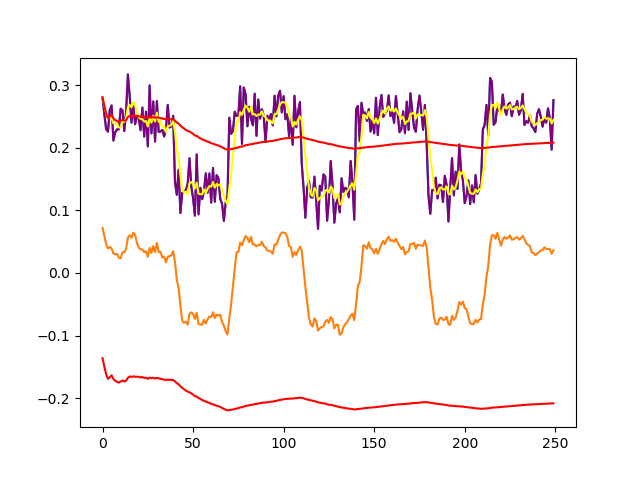

In [3]:


#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
ax = plt.gca()

ax.plot(X, label = 'syntetická data')
ax.plot([cl.aritmeticky_prumer_fce(X, x, 5) for x in range(len(X))]-np.mean(X), label = r'$\boldsymbol{\widetilde{X}}$')
#ax.plot([cl.aritmeticky_prumer_fce(X, x, 5) for x in range(len(X))], label = r'$\boldsymbol{\widetilde{X}}$')
ax.plot(aritm(X)-2*np.mean(X), color = "red", label = r'$\boldsymbol{\overline{X}}$')
#ax.plot(aritm(X), color = "red", label = r'$\boldsymbol{\overline{X}}$')
#ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [4]:
pylab.plot(X,color = 'purple', label='syntetická data')
#pylab.plot([cl.aritmeticky_prumer_fce(X, x, 5) for x in range(len(X))]-np.mean(X), label='úsekový aritmetický průměr')
pylab.plot([cl.aritmeticky_prumer_fce(X, x, 5) for x in range(len(X))],color = 'yellow', label='úsekový aritmetický průměr')
#pylab.plot(aritm(X)-1.8*np.mean(X), color = "red" , label = "standartní aritmetický průměr")
pylab.plot(aritm(X), color = "red" , label = "standartní aritmetický průměr")
pylab.legend(loc='upper right')
#pylab.ylim(-0.2, 0.48)

<IPython.core.display.Javascript object>


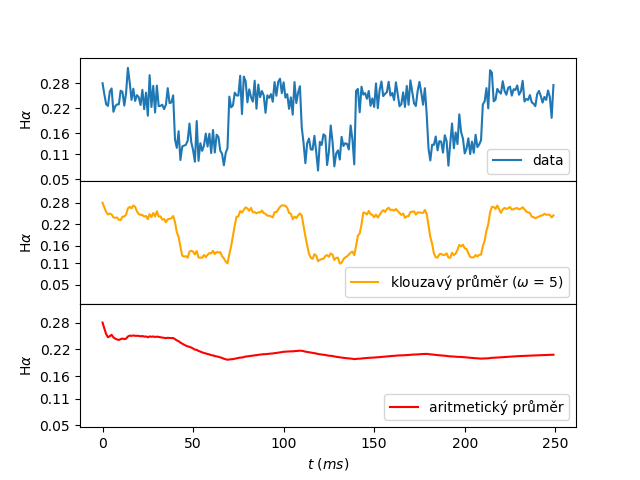

In [4]:
usek  =[cl.aritmeticky_prumer_fce(X, x, 5) for x in range(len(X))]
ar = aritm(X)

gmax = max([max(X), max(usek), max(ar)])+((max(X)-min(X))/10)
gmin = min([min(X), min(usek), min(ar)])-((max(X)-min(X))/10)

fig, axs = plt.subplots(3,1, sharex = True)
fig.subplots_adjust(hspace = 0)
axs[0].plot(X, label = "data")
axs[0].set_yticks(np.around(np.arange(gmin, gmax,(gmax-gmin)/5), decimals = 2))
axs[0].set_ylim(gmin,gmax)
axs[0].set_ylabel(r'H$\alpha$')
axs[0].legend(loc = "lower right")
axs[1].plot(usek, label = r"klouzavý průměr ($\omega$ = 5)", color = "orange")
axs[1].set_yticks(np.around(np.arange(gmin, gmax,(gmax-gmin)/5), decimals = 2))
axs[1].set_ylim(gmin-0.05,gmax)
axs[1].set_ylabel(r'H$\alpha$')
axs[1].legend(loc = "lower right")
axs[2].plot(ar, label = 'aritmetický průměr', color  = "red")
axs[2].set_yticks(np.around(np.arange(gmin, gmax,(gmax-gmin)/5), decimals = 2))
axs[2].set_ylim(gmin,gmax-0.02)
axs[2].set_ylabel(r'H$\alpha$')
axs[2].set_xlabel(r'$t \ (ms)$')
axs[2].legend(loc = "lower right")
plt.show()

<IPython.core.display.Javascript object>


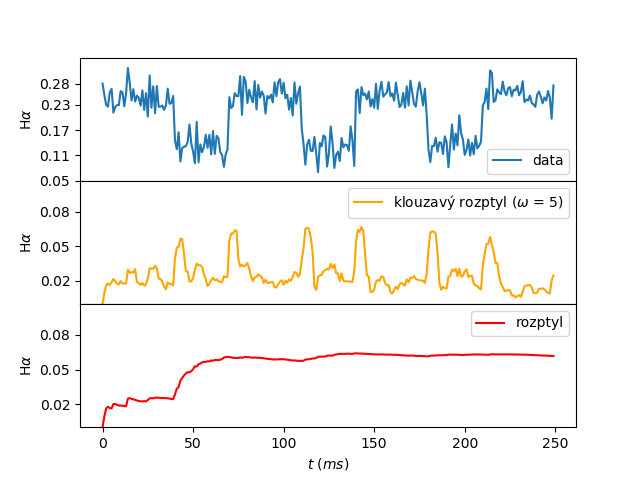

In [27]:
aritmetiky_prumer_od_pocatku = np.cumsum(X) / (np.arange(len(X)) + 1)
Rozpt = cl.rozptyl_od_poc_fce(X, aritmetiky_prumer_od_pocatku)

Rozptyl = cl.rozptyl_fce(X, 5)

gmax = max([max(X), max(Rozpt), max(Rozptyl)])+((max(X)-min(X))/10)
gmin = min([min(X), min(Rozpt), min(Rozptyl)])-((max(X)-min(X))/10)

ggmax = 1.6*max([max(Rozpt), max(Rozptyl)])

fig, axs = plt.subplots(3,1, sharex = True)
fig.subplots_adjust(hspace = 0)
axs[0].plot(X, label = "data")
axs[0].set_yticks(np.around(np.arange(0.05, gmax,(gmax-0.05)/5), decimals = 2))
axs[0].set_ylim(0.05,gmax)
axs[0].set_ylabel(r"H$\alpha$")
axs[0].legend(loc = "lower right")
axs[1].plot(Rozptyl, label = "klouzavý rozptyl ($\omega$ = 5)", color = "orange")
axs[1].set_yticks(np.around(np.arange(-0.01, ggmax,(ggmax+0.01)/4), decimals = 2))
axs[1].set_ylim(0,ggmax)
axs[1].set_ylabel(r"H$\alpha$")
axs[1].legend(loc = "upper right")
axs[2].plot(Rozpt, label = 'rozptyl', color  = "red")
axs[2].set_yticks(np.around(np.arange(-0.01, ggmax,(ggmax+0.01)/4), decimals = 2))
axs[2].set_ylim(0, ggmax)
axs[2].set_ylabel(r'H$\alpha$')
axs[2].legend(loc = "upper right")
axs[2].set_xlabel(r"$t \ (ms)$")
plt.show()

In [5]:
N = np.arange(10)
N

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])